In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
iris = datasets.load_iris()

x = scale(iris.data)

y = pd.DataFrame(iris.target)

variables_names = iris.feature_names
x[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [10]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [12]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
y.columns = ['Target']

Text(0.5,1,'K-Means Classification')

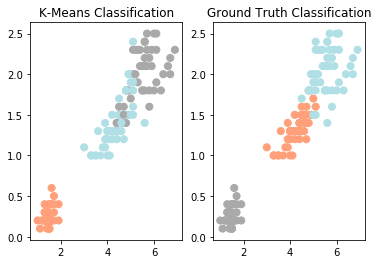

In [17]:
color_theme = np.array(['darkgrey', 'lightsalmon', 'powderblue'])

# Ground Truth Classification
plt.subplot(1,2,2)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

# K-Means Clustering
plt.subplot(1,2,1)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

Text(0.5,1,'K-Means Classification')

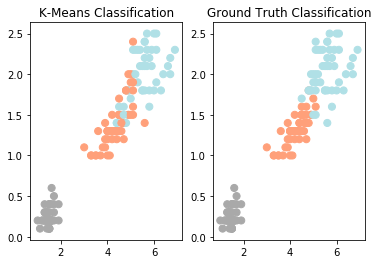

In [20]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype('int64')

# Ground Truth Classification
plt.subplot(1,2,2)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

# K-Means Clustering
plt.subplot(1,2,1)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=color_theme[relabel], s=50)
plt.title("K-Means Classification")

In [24]:
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

